# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [17]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [18]:
data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MDEV       float64
dtype: object

In [19]:
data.head()

,RM,LSTAT,PTRATIO,MDEV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [20]:
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MDEV, dtype: float64

In [21]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [22]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

RM:  An increase in 'RM' most likely corrolate with an increase in MDEV. Prima Facie, all things being similar, a house having more rooms is most likely more expensive than a house with less rooms.  

LSTAT: A large LSTAT means more people in other neighborbood is richer than people in the local neighborhood. This means a high LSTAT is corrolated with low economic net worth, or low economic status in the local neighborhood. This means an increasing LSTAT is corrolated with a decreasing MDEV 

PTROTIO: A high PTROTIO means the ratio of students to teacher is high. It means more students per teacher. If each teacher pay equal attention to all the students under his/her watch, then a high PTROTIO means each student will receive less attention from teacher. This means a high PTROTIO means less resources( in this case, attention is a resource) is devoted to each student. Prima Facie, I think most people would want to pay a higher housing price if this means greater educational resources for their offspring. This means a high PTROTIO corrolates to lower resoucrces per student which corrolates to lower MDEV. This means an increase in PTROTIO  is corrolated with a decrease in MDEV. 



----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [23]:
# TODO: Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict) 
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [24]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

Yes, I think it is quite successful in capturing the variations of the target variable, because R^ 2 is very close to 1. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [25]:
# TODO: Import 'train_test_split'
from sklearn import cross_validation
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, prices, test_size = .20,  random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

We want to construct a model that would allow us to generalize to unseen data. In order to constuct a ML model, we need a classifier, and we need a good size dataset that allow the classifer( of our choice) to learn from our dataset. For our trained model to be able to generalize to unseen data, we would need a set of data that already have the "anwsers" do that we can have measure between predictions from our classifer, and the true answers. This is a reason why we split our dataset between training, and testing. The testing dataset allow the ML engineer to see how well his/her his model measure up against a set of data with the "right answers".

Now, given the description above, how we split our dataset into training dataset, and testing dataset can cause different types of errors. To give some examples, we could split our dataset such that 70% of the data is in the training dataset, and 30% of the data becomes the testing dataset. We could also split our dataset such that 10% of the data is in the training dataset, and 90% of the data becomes the testing dataset. What are the sources of errors? If we have a small dataset such that we split it where we train the classifer using only 10% of the dataset, then we might run the risk of "bias". That is, we have insufficient data to train our model. Our model is subject to learning the noise of a small dataset draw from a larger dataset. On the other hand, we can train our model with 95% of the dataset, our dataset size is high, our model complexity is high, and our training error is low, then our classifer runs the risk of overfitting. That is, our classifer is so well in capturing the dataset that it captures the noises in the dataset, and "miss out on the signal". Our classifer model becomes a description of the training dataset, rather than a model that can generalize to unseen data.

If the source of error in represented by the vertical axis, and train set size is represented by the x-axis. For small training set size, there would be high error( due to bias). For large training set size, there would also be high error( due to overfitting). What we want is the middle region. Not to high, and not too low for our training set.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

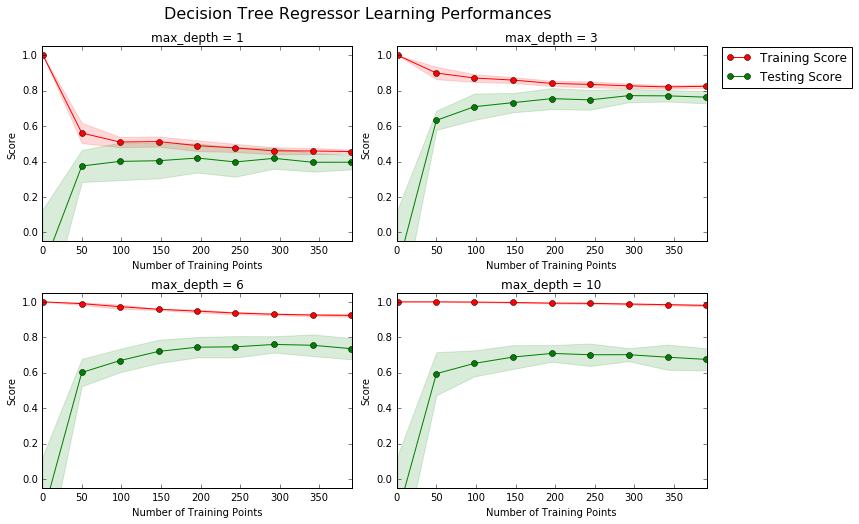

In [26]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

I pick the picture for max_depth = 6 above. Note that in this case, the complexity, or expressiveness of the tree is held fixed at max-depth=6. The graph shows the total error over the size of the training set. Mathematically, what must hold? Max_depth = 6 sets a limit on the complexity, or expressiveness of the tree. As the number of points in the training set increase, of course we will running up the limit of the expressiveness of what this regression trees can capture in our training dataset, since the expressiveness of our tree is held fixed we ought to see our training error increase as our training set size increase( Indeed, this is what we see in the green graph as we see a gradual increase in error for the training error). Given a sufficiently complex tree( Not too simple, and not too complex, but just right) held fixed, we would also expect our out of sample testing error would lower as our training set size increase( This is indeed what we see in the blue graph as it inch lower over the increase size of the training set size).


Does adding more training points help with the scores? Probably not. Since the complexity of our tree is held fixed, there is a limit on how expressive our tree is in capturing all the training points in an ever expanding training set. Indeed, we would expect that increasing the number of training point( assumping high variance of the data) would indeed give us ever greater training error. Suppose the underlying data don 't have high variance, or in other words, there is regularity, then giving the fixed complexity of our tree, the training error probably converged in some epsilion, and indeed in the graph above, we see that the red line converge to some value of 1-epsilion = .85 approximately. What is true for training error is also true for testing errors. The fixed complexity  of our tree fixes the limited of the expressiveness of our tree. Assume our dataset does not have high variance, but that there is regularity, then we would also assume that testing error would converge to some value, say kappa. Indeed, if we look at the green graph, we see it coverge to some value of 1- kappa= .75 approximately. 


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

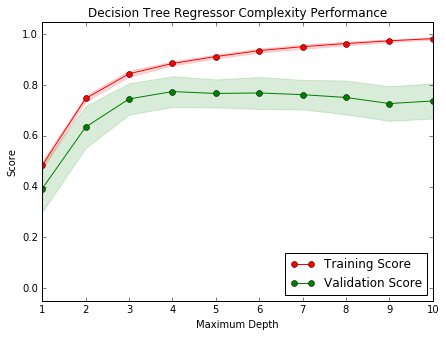

In [27]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

A high max_depth means that our regression tree has more levels, more expressive, and thus more complex. The intution is that a low max_depth run the risk of bias, and a high max_depth run the risk of variance(overfitting). If we keep everything being equal, and using the "full training set", and that is 350 training points. We would expect everything being equal, that max_depth=1 is a classifer with an insufficiently expressive tree, our expectation is high training error, and high testing error( Indeed, if you look at the graph for max_depth = 1, at the vertical line training set size = 350, we have a relatively high training, and testing error compare to other trees of more higher max_depth). We would also expect that for max_dapth=10, and our full training set assumption( everything being equal) run the risking of high variane( or overfiting). The tree is so complex, and expressive that it captures the training data perfectly. We would expect training error to be vanishingly toward zero. We would also expect our testing error for this very expressive tree to have high variance( overfitting). Indeed, this is what we see in our our graph for max_dept =10, at vertical training set = 350, our training error is zero( because our tree is so expressive that it captures all the data), and our testing error is not at total error of 30 because of error entirely due to variance(overfitting). That is, the inability of our expressive tree to generalize to our testing dataset.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

As max depth increase, training error falls, while testing error falls from (4, inf).
The max depth that best generalize the data is when max depth is 4.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search are used to find the right combination of hyperparameters of a given M.L. classifier that gives the best score defined by the performance metrics.

It is applicable when the user know what the M.L. classifier to apply to the dataset, but do not know the best hyperparameters for the classifier. Grid search algorithm search all the possible combination of hyperparameters specified by the user, and return the classifer, with the best hyperparameters specified by the performance metric. Grid search is computationally expensive, and is cursed by the curse of dimensionality.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

Cross-validation is the process of spliting up the dataset into a training set, and testing set to obtain an out of sample accuracy measure( also known as a Cross-validation score). Since there are multiple ways of spliting up a dataset into training, and testing. Cross validation such as KFold splits a dataset up into K bins, using one bin as testing set, and the rest of the k-1 bin as training set for our classifer. The cross validation score is computed by averaging the K testing errors for each of the k iteratons testing scores.

Grid Search is a way to fine tune the "hyperparameters" of our classifer. Using the examples from this project, our classifer is a regression tree, and one of the hyperparameters for this classifer is max_depth. Grid Search is about looking at each value of max_depth to find the right one. Cross validation using a given classifer along with the dataset provides grid-search a score/measure by which grid-search search throught the range of possible combination of hyperparamaters( In this project, search through possible values of "max_depth") to find the optimize set of hyperparameters(In our case, the right "max_depth" value) that give use the highest possible cross validation score for each combination of hyperparameters( In our case, the right value for max_depth for our regression tree).

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [28]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer (performance_metric,greater_is_better=True)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc )
    

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [29]:
# Fit the training data to the model using grid search
reg = fit_model(features, prices)
# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

Perfectly!! ( my answer is 4 as well )

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [30]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $408,800.00
Predicted selling price for Client 2's home: $231,253.45
Predicted selling price for Client 3's home: $938,053.85


**Answer: **

Yes, they seem reasonable given the trust we have of the model. It gives us a fair price/worth of what the house is actually worth, but as a seller, I don 't want a fair price, but I want a profitable price for my client, and me. 

For my client 1, and 2, their prices fall below the median price of  438,900.00.
I probably would tell them to sell their homes at the median price of $438,900.00 to be profitable, while being reasonable to the buyer. 

I would advise my client 3 to cell at 1 million as it is below the Maximum price of $ 1,024,800.00. This is profitable for my client, and me, while being reasonable talking point for the buyer. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [31]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **



Consider the data is from the 1970 s, I probably would not use the data. I probably would try different classifiers to see if I can have a lower testing error. I would probably find some more recent housing data for my dataset. I probably would trying different cross validation methods such as Kford, instead of just setting my test size to 30% of the dataset.
Perhaps other classifiers might have a better chance of lowering the total testing error. Given that I don 't currently have enough examples, I don 't think I can say dicisionTreeRegressor is the best classifier for predicting housing prices.

# Commentary

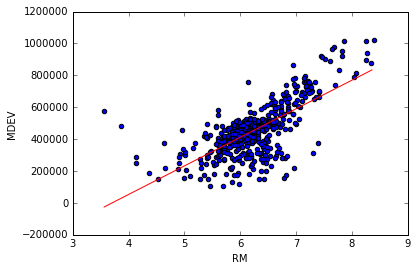

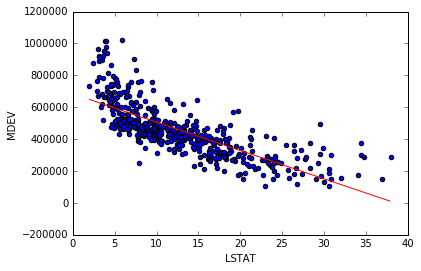

In [32]:
for feature in ["RM","LSTAT"]:

    #Scatter plot.
    ax = data.plot(kind="scatter", x=feature,y="MDEV")

    #Line of best fit (polynomial of degree 1).
    w1, w0 = np.polyfit(data[feature],data["MDEV"],deg=1)

    #Plot line of best fit.
    rng = np.arange(np.min(data[feature]),np.max(data[feature]),0.1)
    ax.plot(rng,[w0+w1*x for x in rng],color="red")